Proyecto 1- Parte final (Core)

Proyecto 1: Análisis y Predicción de Ventas en una Tienda de Retail

Objetivo: Realizar un análisis exploratorio de datos (EDA) completo, preprocesamiento y benchmarking de técnicas de machine learning para predecir ventas en una tienda de retail. Además, generar un análisis de métricas y crear una presentación de una página (one-page) en PPT para explicar los resultados. Todo el trabajo debe ser subido como una versión de liberación (v1.0.0) en GitHub.

# Parte 1: Exploración y Visualización de Datos (EDA)


## Carga y Exploración Inicial de Datos:
* Cargar el dataset y revisar su estructura básica.
* Describir las variables y su distribución.
* Identificar y tratar valores nulos y outliers.

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [54]:
# cargar el dataset automobile data
data = pd.read_csv('../datak/retail_sales_dataset.csv', nrows=100000)
print(data.shape)
data.info()
data.head(5)


(1000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [55]:
# eliminamos columnas no relevantes
data = data.drop(columns=['Transaction ID', 'Date', 'Customer ID'])

In [56]:
# Corregimos los tipo de datos
data_type = {
    'Gender' : 'category',
    'Product Category' : 'category',    
}
data = data.astype(data_type)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Gender            1000 non-null   category
 1   Age               1000 non-null   int64   
 2   Product Category  1000 non-null   category
 3   Quantity          1000 non-null   int64   
 4   Price per Unit    1000 non-null   int64   
 5   Total Amount      1000 non-null   int64   
dtypes: category(2), int64(4)
memory usage: 33.6 KB


In [57]:
print("Duplicados:", data.duplicated().sum())
print("Nulos: ", data.isnull().sum())
data.describe()

Duplicados: 89
Nulos:  Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


,Age,Quantity,Price per Unit,Total Amount
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,41.39200,2.514000,179.890000,456.000000
std,13.68143,1.132734,189.681356,559.997632
min,18.00000,1.000000,25.000000,25.000000
25%,29.00000,1.000000,30.000000,60.000000
50%,42.00000,3.000000,50.000000,135.000000
75%,53.00000,4.000000,300.000000,900.000000
max,64.00000,4.000000,500.000000,2000.000000


In [58]:
data.columns

Index(['Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit',
       'Total Amount'],
      dtype='object')

### Distribucion de variables

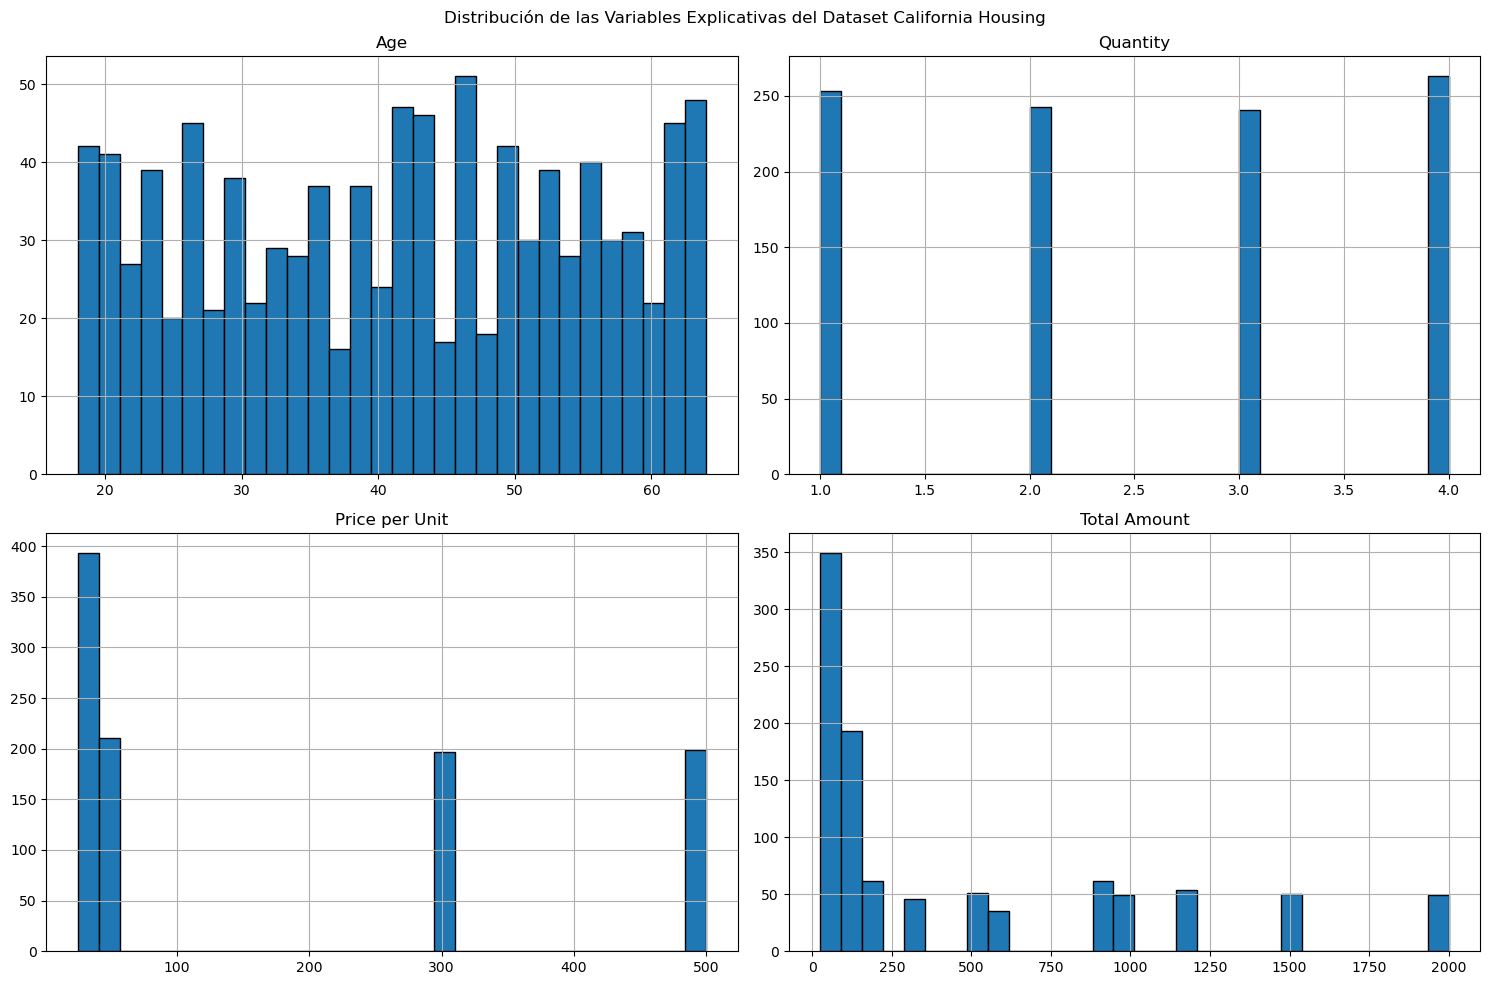

In [59]:
# Crear histogramas para cada característica
data.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribución de las Variables Explicativas del Dataset California Housing')
plt.tight_layout()
plt.show()

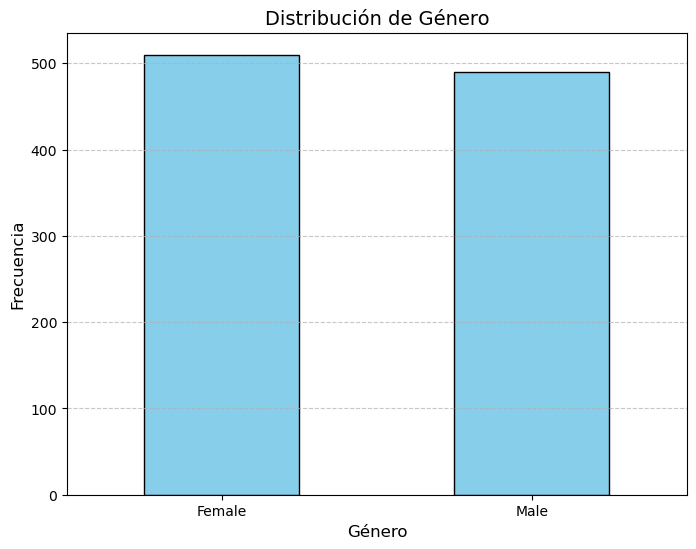

In [60]:
genero_dist = data['Gender'].value_counts()
producto_dist = data['Product Category'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
genero_dist.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución de Género', fontsize=14)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

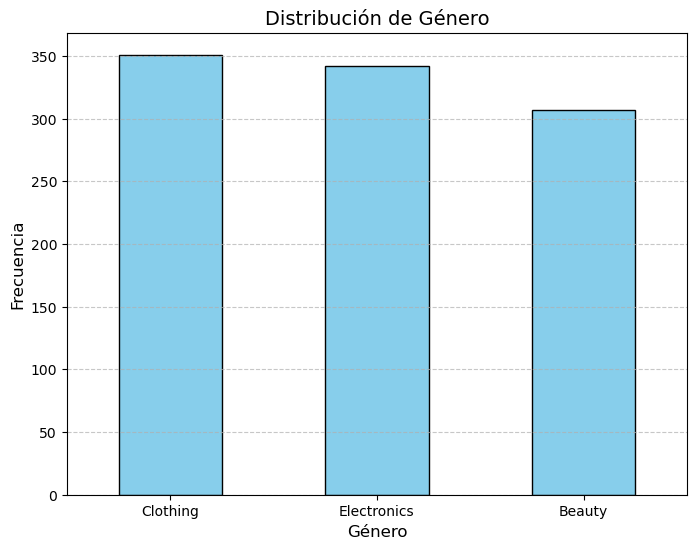

In [61]:
# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
producto_dist.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución de Género', fontsize=14)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Análisis de Correlación:

Realizar un análisis de correlación y crear un mapa de calor para visualizar las relaciones entre las variables.

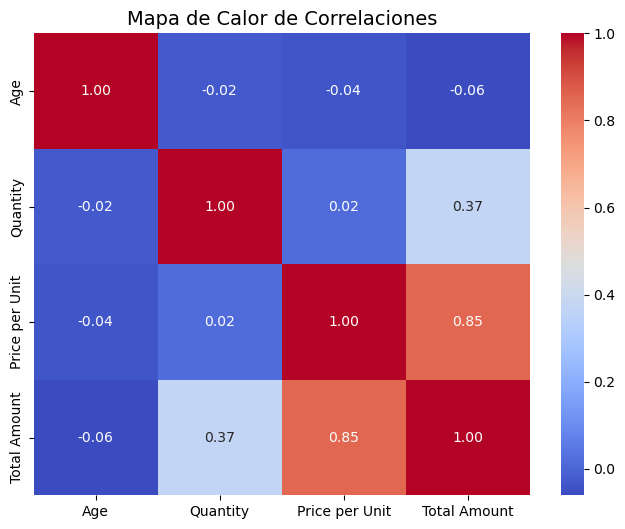

In [62]:
numeric_columns = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']

# Calcular la matriz de correlación
correlation_matrix = data[numeric_columns].corr()

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Mapa de Calor de Correlaciones', fontsize=14)
plt.show()

## Visualización de Datos:
* Crear subplots para comparar diferentes variables clave.
* Añadir cuadrículas, leyendas, anotaciones y flechas a los gráficos para mejorar la claridad y la información.

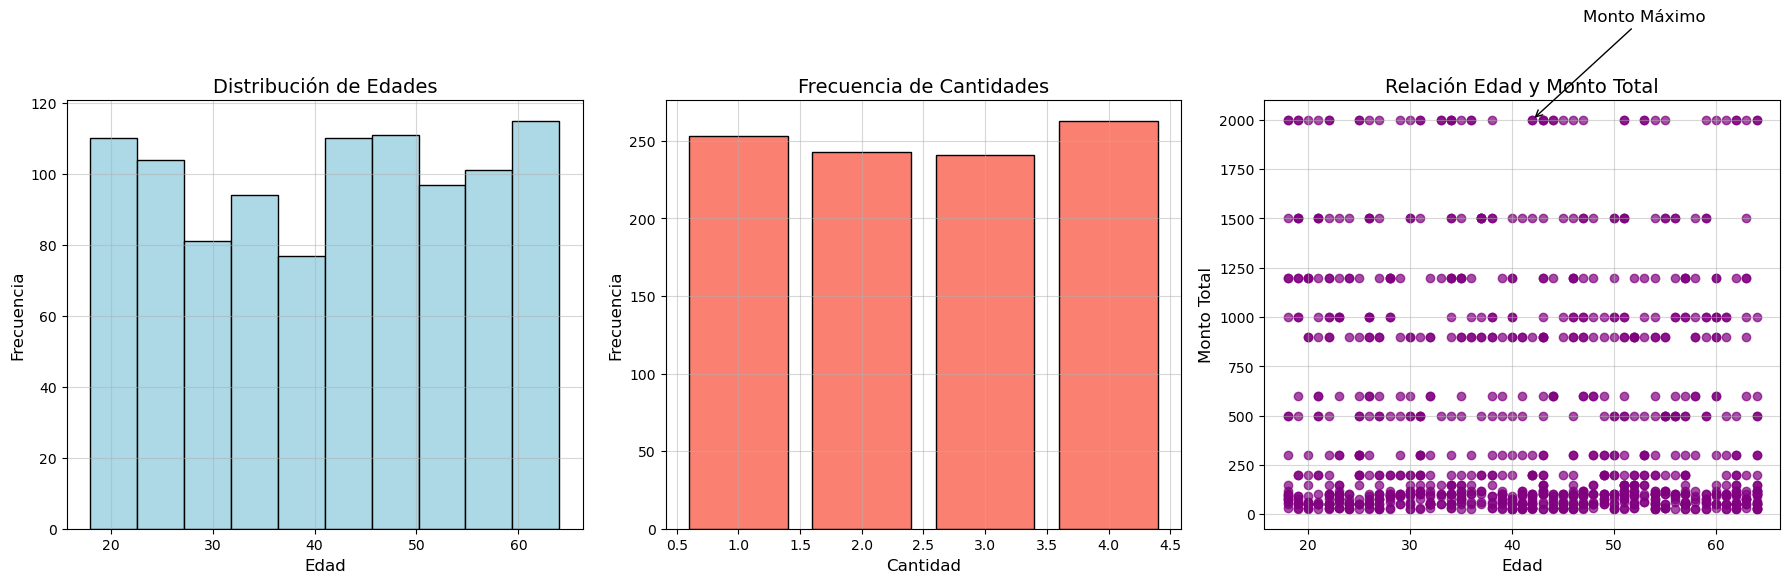

In [63]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico 1: Histograma de Age
axes[0].hist(data['Age'], bins=10, color='lightblue', edgecolor='black')
axes[0].set_title('Distribución de Edades', fontsize=14)
axes[0].set_xlabel('Edad', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)
axes[0].grid(alpha=0.5)

# Gráfico 2: Gráfico de barras para Quantity
quantity_counts = data['Quantity'].value_counts()
axes[1].bar(quantity_counts.index, quantity_counts.values, color='salmon', edgecolor='black')
axes[1].set_title('Frecuencia de Cantidades', fontsize=14)
axes[1].set_xlabel('Cantidad', fontsize=12)
axes[1].set_ylabel('Frecuencia', fontsize=12)
axes[1].grid(alpha=0.5)

# Gráfico 3: Gráfico de dispersión entre Age y Total Amount
axes[2].scatter(data['Age'], data['Total Amount'], alpha=0.7, color='purple')
axes[2].set_title('Relación Edad y Monto Total', fontsize=14)
axes[2].set_xlabel('Edad', fontsize=12)
axes[2].set_ylabel('Monto Total', fontsize=12)
axes[2].grid(alpha=0.5)

# Añadir anotaciones y flechas en el gráfico 3 como ejemplo
max_amount_index = data['Total Amount'].idxmax()
axes[2].annotate('Monto Máximo', 
                 xy=(data['Age'][max_amount_index], data['Total Amount'][max_amount_index]), 
                 xytext=(data['Age'][max_amount_index] + 5, data['Total Amount'][max_amount_index] + 500),
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 fontsize=12)

# Ajustar el espacio entre gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

# Parte 2: Preprocesamiento de Datos

## Transformación de Columnas:
* Utilizar ColumnTransformer para aplicar transformaciones específicas a diferentes columnas.
* Realizar codificación de variables categóricas y escalado de variables numéricas.
* Crear pipelines para automatizar el preprocesamiento de datos y asegurar la reproducibilidad.

In [113]:
# Seleccionar columnas
X = data[['Gender', 'Product Category', 'Quantity', 'Age']] 
y = data['Total Amount'] 

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir columnas categóricas y numéricas
categorical_columns = ['Gender', 'Product Category']
numerical_columns = ['Total Amount', 'Quantity', 'Age']

# Definir transformaciones específicas para cada tipo de dato
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns),  # Codificación categórica
        ('num', StandardScaler(), numerical_columns)  # Escalado numérico
    ]
)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


In [ ]:

# Entrenar el modelo
model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular R² y MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R²: {r2:.2f}")
print(f"MSE: {mse:.2f}")


ValueError: A given column is not a column of the dataframe

NameError: name 'y_pred' is not defined

In [88]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor())
])

# Entrenar el modelo KNN
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular R² y MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R²: {r2:.2f}")
print(f"MSE: {mse:.2f}")




ValueError: A given column is not a column of the dataframe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Gender',
                                                   'Product Category']),
                                                 ('num', StandardScaler(),
                                                  ['Total Amount', 'Quantity',
                                                   'Age'])])),
                ('regressor', LinearRegression())])